In [11]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.desi.preprocess import rebin
from dla_cnn.data_model.Sightline import Sightline
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [12]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = r"F:\Astronamy\desi-0.2-100\desi-0.2-100\desi-0.2-100\spectra-16\7"
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

In [13]:
spec = DesiMock()
spec.read_fits_file(spectra,truth,zbest)

In [14]:
data = spec.data

In [15]:
spec_id = list(data.keys())

961


<IPython.core.display.Javascript object>


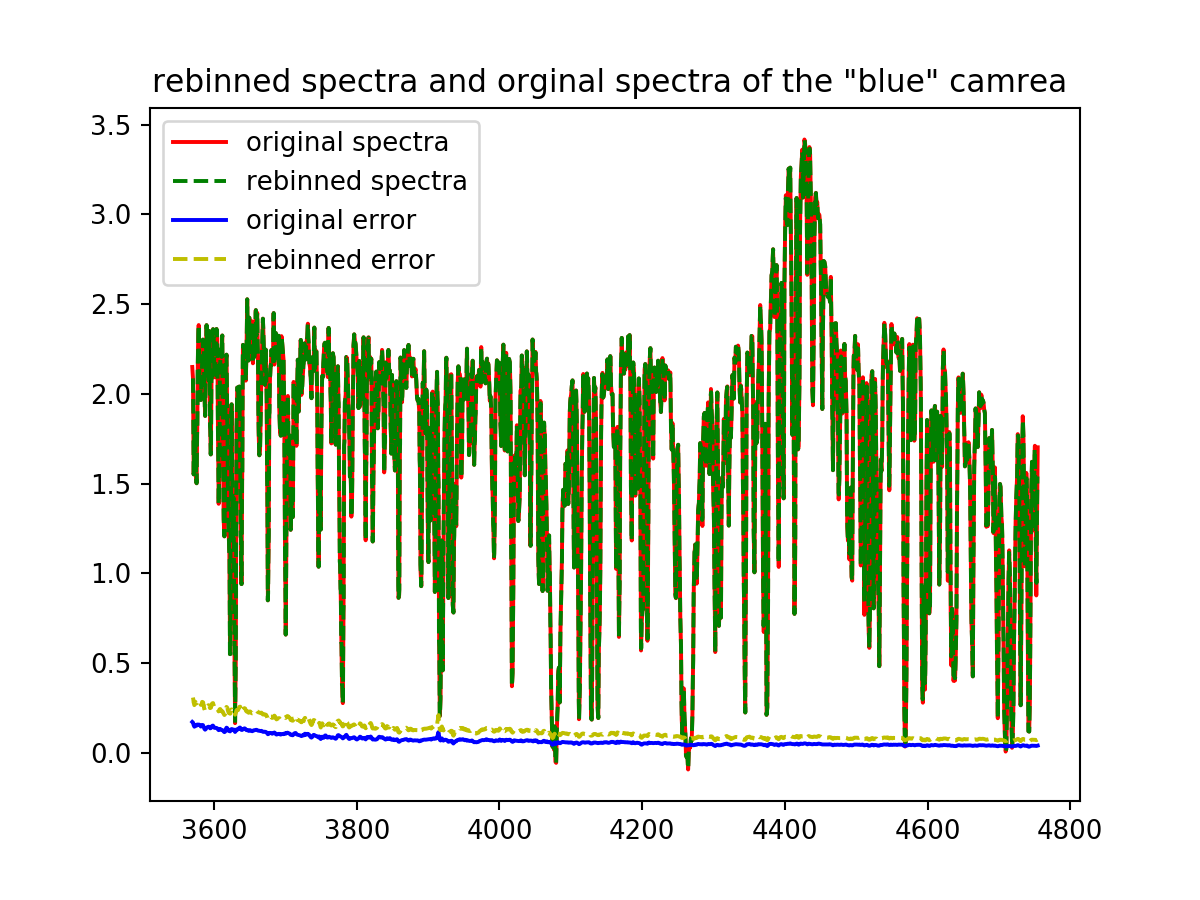

In [60]:
sightline = spec.get_sightline(spec_id[0], camera= 'b')

wavelength = 10**sightline.loglam
flux = sightline.flux
error = sightline.error

rebin(sightline, v = 40000)

new_wavelength = 10**sightline.loglam
new_flux = sightline.flux
new_error = sightline.error

print(len(new_wavelength)-len(wavelength))

plt.plot(wavelength, flux, 'r',label = 'original spectra')
plt.plot(new_wavelength, new_flux, 'g--', label = 'rebinned spectra')
plt.plot(wavelength,error,'b',label = 'original error')
plt.plot(new_wavelength,new_error,'y--',label = 'rebinned error')
plt.title('rebinned spectra and orginal spectra of the "blue" camrea ')
plt.legend(loc = 'best')